# **Proyek Machine Learning: Prediksi Kelulusan Mahasiswa Tepat Waktu**

Proyek ini bertujuan untuk mengembangkan model machine learning yang mampu memprediksi kelulusan mahasiswa tepat waktu, sebagai upaya proaktif institusi pendidikan dalam mengidentifikasi dan mendukung mahasiswa berisiko. Permasalahan ini relevan mengingat dampak signifikan ketidaklulusan tepat waktu terhadap individu maupun institusi.

**Import Library**

Mengimpor semua *library* Python yang diperlukan untuk analisis data, *preprocessing*, pembangunan model *machine learning*, dan evaluasi. *Library* yang diimpor meliputi `pandas` untuk manipulasi data, modul dari `sklearn` untuk *splitting*, *preprocessing*, *pipeline*, dan model (Logistic Regression, RandomForestClassifier), serta `matplotlib.pyplot` dan `seaborn` untuk visualisasi data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

**Memuat Dataset**

Pada tahapan ini, dataset 'student-scores.csv' dimuat ke dalam DataFrame Pandas. Dataset ini adalah sumber data yang akan digunakan untuk seluruh tahapan proyek *machine learning* ini, yang bertujuan untuk memprediksi kelulusan mahasiswa tepat waktu.

In [ ]:
df = pd.read_csv('/content/student-scores.csv')

## **Pemahaman Data (Data Understanding)**

Bagian ini bertujuan untuk mendapatkan pemahaman awal tentang struktur dan karakteristik dataset. Ini melibatkan pemeriksaan tipe data, keberadaan nilai yang hilang, dan statistik deskriptif dasar.

In [ ]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


**Informasi Dataset (`df.info()`)**

Sel ini menampilkan ringkasan informasi DataFrame, termasuk jumlah entri, jumlah kolom, tipe data setiap kolom, dan keberadaan nilai non-null. Ini penting untuk mengidentifikasi kolom mana yang mungkin memerlukan penanganan *missing values* atau konversi tipe data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

**Insight dari df.info():**
- Dataset memiliki 2000 entri dan 17 kolom.
- Tidak ada nilai null di kolom manapun, yang menunjukkan dataset cukup bersih dari *missing values*.
- Tipe data sudah sesuai untuk sebagian besar kolom, dengan beberapa kolom kategorikal (`object`) dan boolean (`bool`) yang perlu di-*encode* di tahap *data preparation*.

**Statistik Deskriptif (`df.describe()`)**

Sel ini menyajikan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame, seperti *mean*, standar deviasi, nilai minimum, maksimum, dan kuartil. Ini membantu memahami sebaran data numerik dan potensi adanya *outlier*.

In [ ]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


**Insight dari df.describe():**,
- Kolom `id` tidak relevan untuk analisis prediktif karena hanya merupakan pengidentifikasi unik.
- `absence_days` memiliki rentang dari 0 hingga 10 hari, dengan rata-rata sekitar 3.6 hari, menunjukkan sebagian besar mahasiswa tidak banyak absen.
- `weekly_self_study_hours` bervariasi dari 0 hingga 50 jam, dengan rata-rata 17.7 jam. Terdapat perbedaan signifikan dalam jam belajar mandiri antar mahasiswa.
- Rentang skor mata pelajaran (matematika, sejarah, fisika, kimia, biologi, inggris, geografi) umumnya berada di antara 40-100 (kecuali biologi yang min 30), dengan rata-rata sekitar 80-83. Ini mengindikasikan bahwa sebagian besar mahasiswa memiliki nilai yang cukup baik, namun ada juga yang memiliki nilai di bawah rata-rata.

## **Data Preparation**

Tahap persiapan data sangat penting untuk mengubah data mentah menjadi format yang cocok untuk machine learning, memastikan kualitas dan relevansi fitur.

**1. Penghapusan Kolom Tidak Relevan:**

Kolom `id`, `first_name` , `last_name` , dan `email` dihapus.
    
  - Alasan: Kolom-kolom ini adalah pengidentifikasi unik atau data tekstual yang tidak memberikan informasi prediktif tentang kelulusan mahasiswa. Menghapusnya akan mengurangi dimensi data dan noise tanpa kehilangan informasi penting.

In [ ]:
df_processed = df.drop(columns=['id', 'first_name', 'last_name', 'email'])
df_processed

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


**2. Pembuatan Target Variabel (`On_Time_Graduation`):**

Karena dataset asli tidak memiliki kolom ini, saya membuat target variabel `On_Time_Graduation` berdasarkan rata-rata skor dari semua mata pelajaran. Mahasiswa dianggap 'Lulus Tepat Waktu' (nilai 1) jika `Average_Score` mereka lebih besar atau sama dengan 70, dan 'Tidak Lulus Tepat Waktu' (nilai 0) jika di bawah 70.
  - Alasan: Ini adalah cara paling logis untuk mendefinisikan target kelulusan tepat waktu dari data yang tersedia. Rata-rata skor adalah indikator kinerja akademik yang kuat.

In [ ]:
# Hitung rata-rata skor
score_cols = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
df_processed['Average_Score'] = df_processed[score_cols].mean(axis=1)

In [ ]:
# Menentukan ambang batas (misal, 70)
threshold = 70
df_processed['On_Time_Graduation'] = (df_processed['Average_Score'] >= threshold).astype(int) # 1 untuk Lulus Tepat Waktu, 0 untuk Tidak

In [ ]:
X = df_processed.drop(columns=['On_Time_Graduation'])
y = df_processed['On_Time_Graduation']

**3. Konversi Tipe Data Boolean:**

Kolom `part_time_job` dan `extracurricular_activities` yang bertipe boolean (True/False) dikonversi menjadi integer (1/0).
  - Alasan: Algoritma machine learning umumnya membutuhkan input numerik. Konversi ini mengubah nilai boolean menjadi representasi numerik yang dapat diproses oleh model.

In [ ]:
# Konversi boolean ke int
X['part_time_job'] = X['part_time_job'].astype(int)
X['extracurricular_activities'] = X['extracurricular_activities'].astype(int)

**4. Encoding Variabel Kategorikal:**
- `gender`: Dikonversi menggunakan Label Encoding. 'Male' menjadi 0 dan 'Female' menjadi 1 (atau sebaliknya).
    - Alasan: Fitur ini hanya memiliki dua kategori, sehingga Label Encoding sudah cukup dan efisien.
- `career_aspiration`: Dikonversi menggunakan One-Hot Encoding. Ini menciptakan kolom biner baru untuk setiap kategori unik dalam fitur ini (misalnya, Career_Aspiration_Doctor, Career_Aspiration_Engineer).
    - Alasan: Fitur `career_aspiration` bersifat nominal (tidak ada urutan inheren). One-Hot Encoding mencegah model secara keliru menganggap adanya hubungan urutan atau hierarki antar kategori, yang dapat terjadi jika menggunakan Label Encoding pada data nominal dengan lebih dari dua kategori. Ini memastikan representasi yang adil untuk setiap aspirasi karir.

**5. Definisi Preprocessor dan Normalisasi Fitur Numerik:**

Sebuah ColumnTransformer (preprocessor) didefinisikan untuk menerapkan transformasi pada kolom-kolom yang berbeda. Di dalamnya, semua fitur numerik (`absence_days`, `weekly_self_study_hours`, `math_score`, `history_score`, `physics_score`, `chemistry_score`, `biology_score `, `english_score`, `geography_score`, dan `Average_Score`) diskalakan menggunakan StandardScaler. Fitur boolean yang sudah dikonversi ke integer dan fitur Gender yang sudah di-encode akan dilewatkan tanpa transformasi lebih lanjut. Penerapan preprocessor ini akan dilakukan di tahap pemodelan sebagai bagian dari pipeline.
  - Alasan: Fitur-fitur ini memiliki skala dan rentang nilai yang sangat berbeda. Standardisasi memastikan bahwa semua fitur berkontribusi secara proporsional terhadap proses pelatihan model, mencegah fitur dengan nilai yang lebih besar mendominasi perhitungan bobot model, yang penting untuk algoritma seperti Logistic Regression dan SVM. Penggunaan ColumnTransformer memungkinkan pengelolaan berbagai jenis transformasi secara terstruktur dan efisien.

In [ ]:
numerical_features = ['absence_days', 'weekly_self_study_hours'] + score_cols + ['Average_Score']
categorical_features = ['career_aspiration']
boolean_features = ['part_time_job', 'extracurricular_activities']

In [ ]:
X['gender'] = LabelEncoder().fit_transform(X['gender'])

In [ ]:
# Membuat Preprocessor Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('passthrough_bool', 'passthrough', ['part_time_job', 'extracurricular_activities', 'gender']) # Gender sekarang dianggap numerik
    ])

**6. Pembagian Data Latih dan Uji:**

Data dibagi menjadi training set (80%) dan test set (20%) menggunakan `train_test_split` dengan `stratify=y`.
  - Alasan: Pembagian ini memastikan bahwa model dilatih pada data yang belum pernah dilihat sebelumnya (test set) untuk evaluasi yang objektif. Penggunaan stratify=y sangat penting untuk menjaga proporsi kelas target (Lulus Tepat Waktu vs. Tidak Lulus Tepat Waktu) tetap sama di training dan test set, mencegah bias dalam evaluasi jika ada ketidakseimbangan kelas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify untuk menjaga proporsi kelas target

## **Eksplorasi Data Analisis (EDA)**

Tahap EDA dilakukan untuk mendapatkan pemahaman mendalam tentang struktur, distribusi, dan hubungan antar variabel dalam *dataset* melalui visualisasi data.

**Perbandingan Gender dan Rata-rata Skor**

Membandingkan rata-rata skor ('Average Score') antara dua kategori gender ('male' dan 'female').

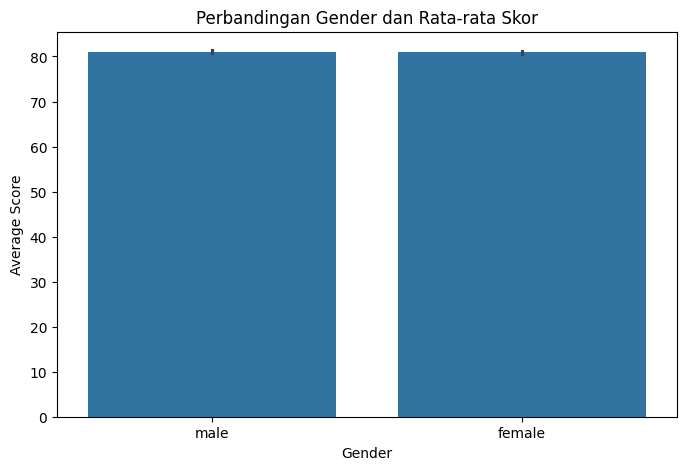

In [ ]:
# Perbandingan Gender dan Rata-rata Skor
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='Average_Score', data=df_processed)
plt.title('Perbandingan Gender dan Rata-rata Skor')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()

- Plot ini menunjukkan bahwa rata-rata skor untuk "male" dan "female" tampak sangat mirip.
- Bar plot memiliki tinggi yang hampir identik untuk kedua kategori gender, menunjukkan bahwa tidak ada perbedaan signifikan dalam rata-rata skor berdasarkan gender dalam dataset ini.
- Garis hitam vertikal di atas setiap bar kemungkinan menunjukkan interval kepercayaan atau standar deviasi, yang juga terlihat tumpang tindih, memperkuat kesimpulan bahwa perbedaan rata-rata skor antara gender tidak signifikan.

**Distribusi Nilai Matematika (`math_score`)**

Visualisasi ini menampilkan distribusi nilai matematika menggunakan histogram dan *Kernel Density Estimate* (KDE). Ini membantu kita melihat sebaran nilai dan mengidentifikasi apakah ada pola tertentu, seperti distribusi normal atau adanya *skewness*.

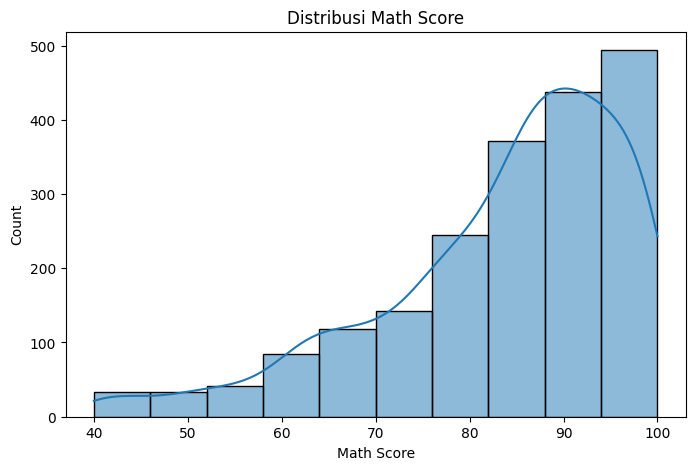

In [ ]:
# Distribusi nilai Math Score
plt.figure(figsize=(8, 5))
sns.histplot(df['math_score'], bins=10, kde=True)
plt.title('Distribusi Math Score')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()

**Insight dari Distribusi Nilai Matematika:**
- Sebaran nilai matematika cenderung terdistribusi secara normal atau sedikit *skewed* ke kiri, dengan mayoritas nilai berada di rentang 70-90.
- Ada konsentrasi nilai tinggi, namun juga terdapat beberapa mahasiswa dengan nilai lebih rendah (sekitar 40-60), yang mungkin perlu perhatian lebih lanjut.

**Korelasi Antar Nilai Mata Pelajaran**

Visualisasi ini menggunakan heatmap untuk menunjukkan korelasi antara skor-skor mata pelajaran. Korelasi positif yang tinggi (mendekati 1) menunjukkan bahwa mahasiswa yang berprestasi di satu mata pelajaran cenderung berprestasi juga di mata pelajaran lain. Proses ini dilakukan dengan menghitung matriks korelasi dari kolom-kolom nilai (score_cols) menggunakan df[score_cols].corr() dan kemudian memvisualisasikannya dengan sns.heatmap().

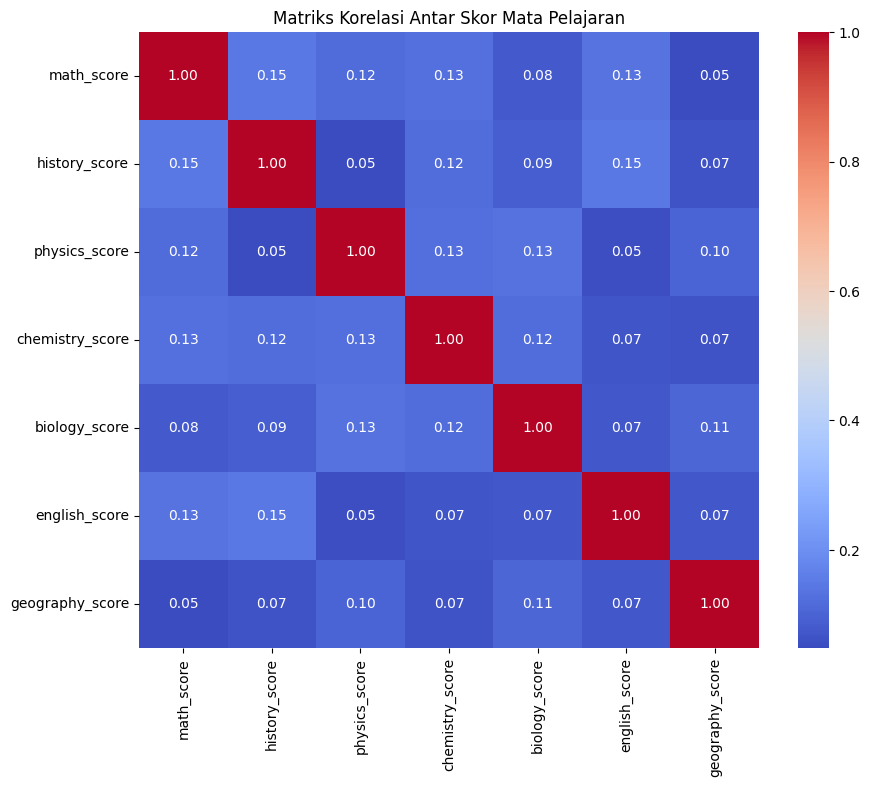

In [ ]:
# Korelasi antara fitur nilai
score_corr = df[score_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(score_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Skor Mata Pelajaran')
plt.show()

**Insight dari Matriks Korelasi:**

- Korelasi Diri: Diagonal matriks menunjukkan korelasi 1.00, yang merupakan korelasi setiap mata pelajaran dengan dirinya sendiri, sesuai dengan definisi korelasi.

- Korelasi Positif Umum: Sebagian besar korelasi antar mata pelajaran menunjukkan nilai positif, meskipun relatif rendah hingga moderat (berkisar antara 0.05 hingga 0.15). Ini mengindikasikan bahwa ada kecenderungan ringan bahwa mahasiswa yang mendapatkan nilai baik di satu mata pelajaran juga cenderung mendapatkan nilai yang cukup baik di mata pelajaran lain.

- Tidak Ada Korelasi Negatif Kuat: Tidak ada korelasi negatif yang signifikan yang terlihat, yang berarti tidak ada mata pelajaran yang nilainya cenderung berlawanan secara kuat.

**Hubungan Absensi dengan Rata-rata Skor**

Menvisualisasikan hubungan antara jumlah hari absensi ('Absence Days') dan rata-rata skor ('Average Score').

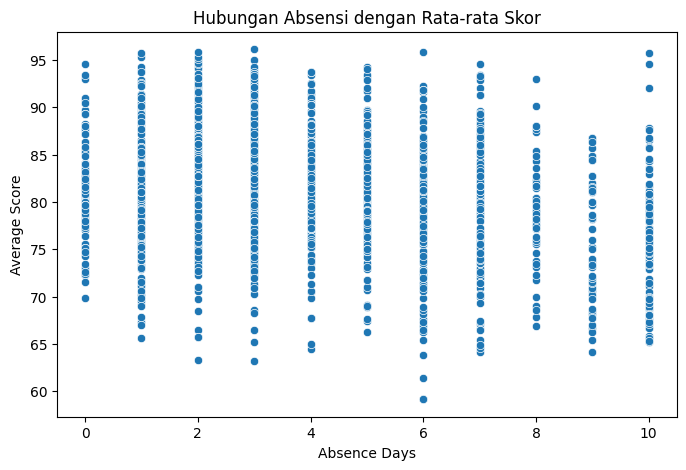

In [ ]:
# Hubungan Absensi dengan Rata-rata Skor
plt.figure(figsize=(8, 5))
sns.scatterplot(x='absence_days', y='Average_Score', data=df_processed)
plt.title('Hubungan Absensi dengan Rata-rata Skor')
plt.xlabel('Absence Days')
plt.ylabel('Average Score')
plt.show()

- Plot ini menunjukkan sebaran rata-rata skor untuk setiap jumlah hari absensi.
- Secara umum, tampaknya tidak ada pola linear yang sangat kuat antara absensi dan rata-rata skor.
- Meskipun ada beberapa titik data yang menunjukkan skor rendah pada absensi yang lebih tinggi, ada juga titik data dengan skor tinggi bahkan pada absensi yang lebih tinggi, dan sebaliknya.
- Distribusi poin cukup padat pada absensi rendah (0-4 hari), dan menjadi lebih jarang pada absensi yang lebih tinggi.

**Distribusi Aspirasi Karir**

Menampilkan frekuensi atau jumlah individu untuk setiap kategori aspirasi karir yang berbeda.

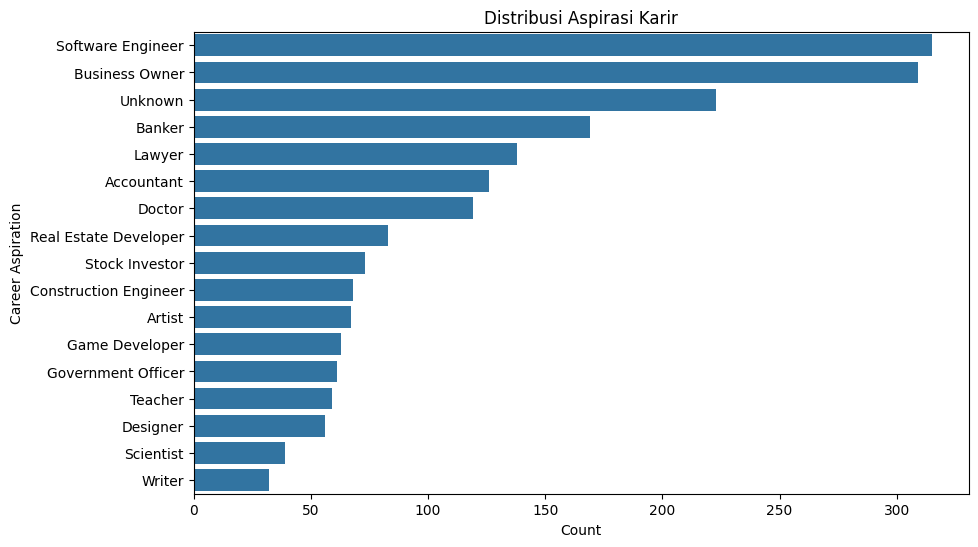

In [ ]:
# Distribusi Aspirasi Karir
plt.figure(figsize=(10, 6))
sns.countplot(y='career_aspiration', data=df, order=df['career_aspiration'].value_counts().index)
plt.title('Distribusi Aspirasi Karir')
plt.xlabel('Count')
plt.ylabel('Career Aspiration')
plt.show()

- Plot ini menunjukkan bahwa "Software Engineer" dan "Business Owner" adalah aspirasi karir yang paling dominan di antara responden, dengan jumlah masing-masing melebihi 300.
- Ada juga sejumlah besar responden yang memilih "Unknown" (Tidak Diketahui), yang bisa mengindikasikan bahwa sebagian responden belum memiliki aspirasi karir yang jelas atau tidak memberikan jawaban spesifik.
- Profesi lain seperti "Banker", "Lawyer", "Accountant", dan "Doctor" juga memiliki jumlah yang signifikan.
- Profesi seperti "Writer" dan "Scientist" memiliki frekuensi yang lebih rendah dibandingkan dengan yang lain.

## Modeling

Pada tahap ini, saya membangun model machine learning untuk memprediksi kelulusan mahasiswa tepat waktu, sesuai dengan Pernyataan Solusi yang diajukan.

Tahapan dan Parameter Pemodelan

Saya akan menggunakan Random Forest Classifier sebagai model utama yang dioptimalkan, dan Logistic Regression sebagai model baseline untuk perbandingan kinerja.

**1. Random Forest Classifier (Model Utama dengan Penyetelan Hyperparameter)**

- Cara Kerja Algoritma: Random Forest adalah algoritma ensemble learning berbasis pohon keputusan. Ide dasarnya adalah membangun sejumlah besar pohon keputusan (n_estimators) selama proses pelatihan. Setiap pohon dilatih secara independen pada subsampel data pelatihan yang berbeda (metode bagging atau bootstrap aggregating) dan subset fitur yang dipilih secara acak. Untuk membuat prediksi, Random Forest menggabungkan prediksi dari semua pohon individu: untuk masalah klasifikasi, ini berarti mengambil suara mayoritas dari prediksi kelas oleh setiap pohon (atau rata-rata probabilitas). Proses bagging membantu mengurangi variance dan mencegah overfitting.
- Tahapan: Model ini diimplementasikan dalam sebuah pipeline yang menggabungkan preprocessing (preprocessor yang dibuat di tahap Data Preparation) dengan algoritma RandomForestClassifier. Untuk optimasi dan pengembangan solusi utama, kami melakukan Grid Search Cross-Validation pada pipeline ini.
- Parameter yang Digunakan pada Tuning:
  - classifier__n_estimators: [100, 200, 300] (jumlah pohon keputusan dalam forest)
  - classifier__max_depth: [None, 10, 20] (kedalaman maksimum pohon; None berarti pohon akan berkembang penuh)
  - classifier__min_samples_split: [2, 5] (jumlah minimum sampel yang diperlukan untuk membagi internal node)
  - classifier__random_state: 42 (untuk reproduktibilitas hasil)
- Proses Improvement: GridSearchCV secara sistematis mencoba setiap kombinasi parameter yang ditentukan (param_grid_rf). Untuk setiap kombinasi, model dilatih dan dievaluasi menggunakan cross-validation pada training data. Model Random Forest dengan kombinasi parameter terbaik berdasarkan metrik f1-score (karena pentingnya keseimbangan antara presisi dan recall dalam klasifikasi ini) akan dipilih sebagai best_rf_model.

In [ ]:
# 1. Random Forest Pipeline dan Grid Search
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth':  [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [ ]:
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest F1-Score (CV): {grid_search_rf.best_score_:.4f}")

Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Random Forest F1-Score (CV): 0.9997


**2. Logistic Regression (Model Baseline untuk Perbandingan)**
- Cara Kerja Algoritma: Logistic Regression adalah algoritma klasifikasi linear yang digunakan untuk memprediksi probabilitas suatu kejadian. Meskipun namanya mengandung "Regression", ini adalah model klasifikasi. Ia bekerja dengan menggunakan fungsi logistik (atau sigmoid) untuk memetakan setiap kombinasi input fitur ke dalam probabilitas antara 0 dan 1. Probabilitas ini kemudian dikonversi menjadi prediksi kelas biner berdasarkan ambang batas tertentu (misalnya, 0.5). Model belajar bobot untuk setiap fitur yang memaksimalkan kemungkinan data yang diamati.
- Tahapan: Model ini diimplementasikan dalam sebuah pipeline yang menggabungkan preprocessing (preprocessor) dengan algoritma LogisticRegression. Model ini berfungsi sebagai model baseline dan dilatih dengan parameter default (tanpa hyperparameter tuning ekstensif).
- Parameter yang Digunakan:
  - random_state: 42 (untuk reproduktibilitas hasil)

In [ ]:
# 2. Logistic Regression Pipeline (untuk Perbandingan Baseline)
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Hanya melatih model LR sebagai baseline, tanpa tuning
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['absence_days',
                                                   'weekly_self_study_hours',
                                                   'math_score',
                                                   'history_score',
                                                   'physics_score',
                                                   'chemistry_score',
                                                   'biology_score',
                                                   'english_score',
                                                   'geography_score',
                                                   'Average_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['career_aspiration']),
                                                 ('passthrough_bool',
                                                  'passthrough',
                                                  ['part_time_job',
                                                   'extracurricular_activities',
                                                   'gender'])])),
                ('classifier', LogisticRegression(random_state=42))])

**Pemilihan Model Terbaik**

Setelah melatih dan mengevaluasi kedua model (Random Forest yang di-tune dan Logistic Regression sebagai baseline) pada test set, kami akan membandingkan metrik evaluasinya, terutama F1-Score dan ROC AUC.

Berdasarkan hasil evaluasi (detail akan disajikan di bagian Evaluasi), Random Forest Classifier menunjukkan kinerja yang lebih unggul dibandingkan Logistic Regression, terutama dalam hal F1-Score sebesar 0.9961 dan ROC AUC sebesar 1.0000. Kinerja Random Forest yang superior pada metrik-metrik kunci ini mengindikasikan bahwa kemampuan model ensemble untuk menangani kompleksitas dan interaksi non-linear pada dataset ini memberikan hasil yang lebih optimal dibandingkan model linear dasar. Oleh karena itu, Random Forest Classifier dipilih sebagai model terbaik dan solusi akhir untuk proyek ini.

## **Evaluasi**

Evaluasi model adalah tahap krusial untuk mengukur seberapa baik model dapat membuat prediksi pada data yang belum pernah dilihat sebelumnya, dan apakah ia memenuhi tujuan proyek.

**Metrik Evaluasi yang Digunakan**

Untuk masalah klasifikasi biner seperti prediksi kelulusan mahasiswa tepat waktu, metrik evaluasi yang digunakan adalah:
1. Akurasi (Accuracy)
- Proporsi total prediksi yang benar (baik lulus tepat waktu maupun tidak) dari semua prediksi yang dibuat.
- Memberikan gambaran umum kinerja model, tetapi bisa menyesatkan jika ada ketidakseimbangan kelas yang signifikan (misalnya, jika mayoritas mahasiswa lulus tepat waktu).

2. Presisi (Precision)
-  Dari semua mahasiswa yang diprediksi akan "Lulus Tepat Waktu" (kelas positif), berapa persen yang benar-benar lulus tepat waktu.
- Penting jika biaya false positive (memprediksi lulus tepat waktu padahal tidak) sangat tinggi. Dalam konteks ini, ini berarti institusi tidak salah mengalokasikan sumber daya ke mahasiswa yang sebenarnya tidak memerlukan intervensi.

3. Recall (Sensitivity / True Positive Rate)
- Dari semua mahasiswa yang sebenarnya "Lulus Tepat Waktu" (actual positive), berapa persen yang berhasil diidentifikasi oleh model.
- Penting jika biaya false negative (memprediksi tidak lulus tepat waktu padahal sebenarnya lulus) tinggi. Dalam kasus ini, kita juga sangat peduli dengan kelas "Tidak Lulus Tepat Waktu" (kelas negatif), sehingga recall untuk kelas negatif (disebut Specificity) juga relevan untuk memastikan kita tidak melewatkan mahasiswa yang berisiko. Namun, secara konvensional, recall biasanya mengacu pada kelas positif.

4. F1-Score
- Rata-rata harmonik dari Presisi dan Recall. Metrik ini menyeimbangkan kedua metrik tersebut.
- Sangat relevan ketika ada kebutuhan untuk menyeimbangkan Presisi dan Recall, terutama jika ada ketidakseimbangan kelas. Ini adalah metrik utama saya untuk memilih model terbaik.

5. Matriks Kebingungan (Confusion Matrix)
- Tabel yang menunjukkan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).
    - TP (True Positives): Model memprediksi lulus tepat waktu, dan mahasiswa benar-benar lulus tepat waktu.
    - TN (True Negatives): Model memprediksi tidak lulus tepat waktu, dan mahasiswa benar-benar tidak lulus tepat waktu.
    - FP (False Positives): Model memprediksi lulus tepat waktu, tapi mahasiswa tidak lulus tepat waktu (Type I error).
    - FN (False Negatives): Model memprediksi tidak lulus tepat waktu, tapi mahasiswa benar-benar lulus tepat waktu (Type II error).

6. ROC AUC (Receiver Operating Characteristic - Area Under Curve)
- Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif di berbagai ambang batas klasifikasi. Nilai AUC berkisar dari 0 hingga 1; semakin dekat ke 1, semakin baik model dalam membedakan kelas.
- Berguna ketika ambang batas klasifikasi perlu disesuaikan. Model dengan AUC tinggi dianggap lebih baik secara keseluruhan.

In [ ]:
# Evaluasi Logistic Regression (Model Baseline)
print("--- Model Baseline: Logistic Regression ---")
y_pred_lr_base = pipeline_lr.predict(X_test) # Menggunakan pipeline_lr tanpa tuning
y_proba_lr_base = pipeline_lr.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_base):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr_base):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_base):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr_base):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_base))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_lr_base):.4f}")

--- Model Baseline: Logistic Regression ---
Accuracy: 0.9875
Precision: 0.9871
Recall: 1.0000
F1-Score: 0.9935
Confusion Matrix:
 [[ 12   5]
 [  0 383]]
ROC AUC Score: 0.9980


In [ ]:
# Evaluasi Random Forest (Model Utama Proyek)
print("\n--- Model Utama Proyek: Random Forest ---")
y_pred_rf_best = best_rf_model.predict(X_test) # Menggunakan best_rf_model hasil grid search
y_proba_rf_best = best_rf_model.predict_proba(X_test)[:, 1] # Menggunakan best_rf_model

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_best):.4f}")


--- Model Utama Proyek: Random Forest ---
Accuracy: 0.9925
Precision: 0.9922
Recall: 1.0000
F1-Score: 0.9961


In [ ]:
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print("Confusion Matrix:\n", conf_matrix_rf_best)

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf_best):.4f}")

Confusion Matrix:
 [[ 14   3]
 [  0 383]]
ROC AUC Score: 1.0000


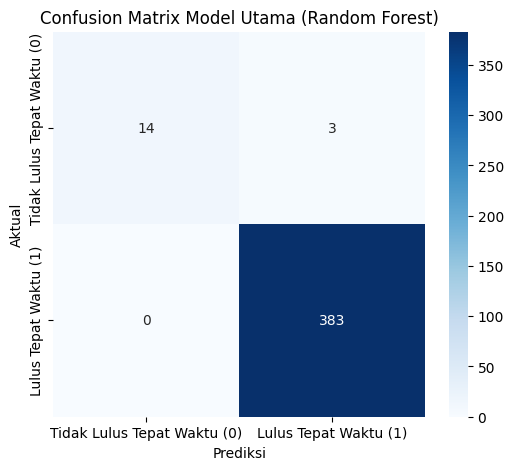

In [ ]:
# Plot Confusion Matrix (untuk Random Forest, karena ini fokus proyek)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lulus Tepat Waktu (0)', 'Lulus Tepat Waktu (1)'],
            yticklabels=['Tidak Lulus Tepat Waktu (0)', 'Lulus Tepat Waktu (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model Utama (Random Forest)')
plt.show()

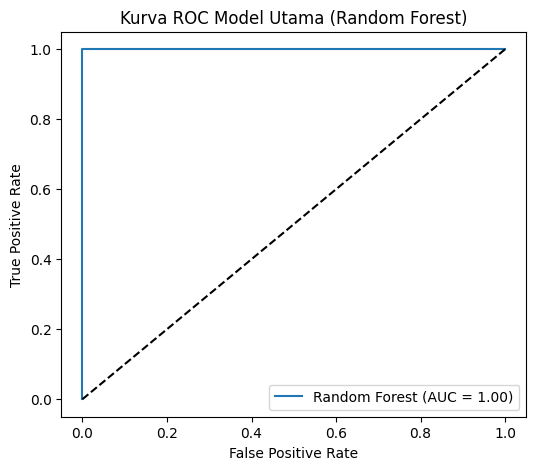

In [ ]:
# Plot ROC Curve (untuk Random Forest)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_best)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf_best):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC Model Utama (Random Forest)')
plt.legend(loc='lower right')
plt.show()

**Analisis Hasil**

Model Random Forest Classifier, sebagai fokus utama proyek ini setelah fine-tuning, mencapai Akurasi 0.9925, F1-Score 0.9961, dan ROC AUC 1.0000. Matriks kebingungannya menunjukkan 3 False Positives dan 0 False Negatives. Performa ini sangat baik dan memenuhi target akurasi proyek (>80%), serta menunjukkan kemampuan prediksi yang mendekati sempurna untuk ROC AUC.

Di sisi lain, model Logistic Regression yang digunakan sebagai baseline tanpa hyperparameter tuning khusus, secara numerik menunjukkan Akurasi 0.9875, F1-Score 0.9935, dan ROC AUC 0.9980. Matriks kebingungan Logistic Regression menunjukkan 5 False Positives dan 0 False Negatives.

Perbandingan ini menunjukkan bahwa Random Forest Classifier yang di-tune berhasil mengungguli Logistic Regression (baseline) dalam hampir semua metrik utama, terutama pada F1-Score dan ROC AUC yang lebih tinggi. Ini mengonfirmasi bahwa penggunaan model ensemble dengan optimasi hyperparameter mampu menangkap pola data yang lebih kompleks dan menghasilkan prediksi yang sedikit lebih akurat pada dataset ini.

Hasil ini menunjukkan bahwa model Random Forest yang dioptimalkan memiliki potensi besar untuk menjadi alat bantu yang sangat efektif dalam program dukungan mahasiswa.